In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Audio_Sound_Classification

/content/drive/MyDrive/Audio_Sound_Classification


In [ ]:
!tar -xvf "/content/drive/MyDrive/Audio_Sound_Classification/UrbanSound8K.tar" -C "/content/drive/MyDrive/Audio_Sound_Classification/" 

Streaming output truncated to the last 5000 lines.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/Audio_Sound_Classification/UrbanSound8K/Dog_bark.wav'


In [ ]:
import IPython.display as ipd #display the graphs
import librosa 
import librosa.display 

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
!dir

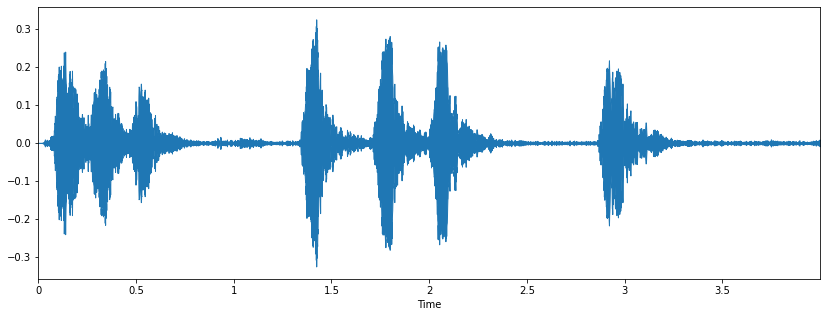

In [ ]:
### Dog Sound
#librosa only it will convert into mono channel
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename) #sample rate
librosa.display.waveplot(data,sr=sample_rate) 
ipd.Audio(filename)

In [ ]:
'''A higher sample rate tends to deliver a better-quality audio reproduction. 
Sample rates are usually measured per second, using kilohertz (kHz) or cycles per second.
 CDs are usually recorded at 44.1kHz - which means that every second, 44,100 samples were taken.
'''

#with librosa read the signal and the sample rate of 22KHz
#librosa try to normailize the dataset and it will try to give the data w.r.t single sample rate
sample_rate # 22kilohertz

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
#wave sample rate
wave_sample_rate

44100

In [ ]:
# https://www.pasco.com/resources/blog/237
'''sound wave represents as intger values'''
#wave audio with scipy and not getting normalize
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

In [ ]:
#in librosa it is giving normalize data(-1 to +1)
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00785246,
       -0.00783031, -0.00796842], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

#  Data Preprocessing

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/Audio_Sound_Classification/UrbanSound8K/audio/fold5/100032-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
#in librosa it is giving normalize data(-1 to +1)( this is 1Dimensional signal)
print(librosa_audio_data)

[-0.00341243 -0.00506065 -0.00463294 ... -0.00247565 -0.00155365
 -0.00035246]


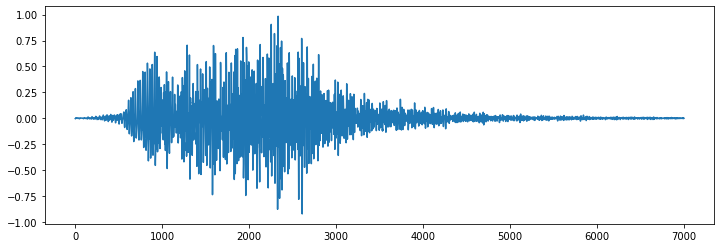

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
#in scipy it will try to give 2D channel(stero channel)
wave_audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

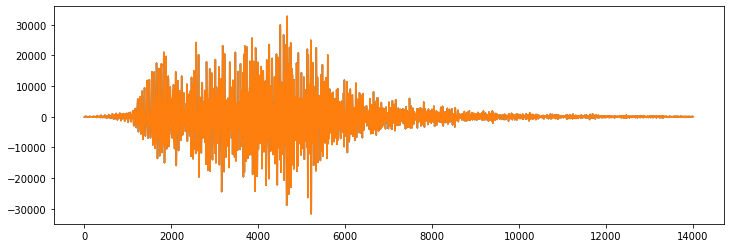

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extracting Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
# Mel-Frequency Cepstral Coefficients(MFCC) for audio signal processing
#https://www.youtube.com/watch?v=4_SH2nfbQZ8

mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
#converted into array of dimensions
print(mfccs.shape)

(40, 14)


In [ ]:
mfccs

array([[-3.03651855e+02, -1.72676208e+02, -9.40941391e+01,
        -6.08684845e+01, -4.41376152e+01, -5.44880638e+01,
        -1.02810043e+02, -1.62934692e+02, -2.18384140e+02,
        -2.69521057e+02, -3.17539673e+02, -3.56184967e+02,
        -3.90368256e+02, -4.19335327e+02],
       [ 1.22872864e+02,  8.81718521e+01,  6.71250916e+01,
         5.37605438e+01,  4.45976105e+01,  3.95891571e+01,
         3.58199539e+01,  3.90013199e+01,  4.81058044e+01,
         5.88260994e+01,  7.00460663e+01,  7.97228088e+01,
         8.62339478e+01,  9.34480438e+01],
       [-1.09454346e+02, -1.24460419e+02, -1.34922775e+02,
        -1.42666565e+02, -1.48852753e+02, -1.50840805e+02,
        -1.45024185e+02, -1.34190659e+02, -1.29958038e+02,
        -1.25843033e+02, -1.16082420e+02, -1.11183174e+02,
        -1.04953178e+02, -9.25063553e+01],
       [-5.01822433e+01, -5.72130508e+01, -6.85044403e+01,
        -7.35098648e+01, -7.03765411e+01, -6.93609314e+01,
        -6.84460678e+01, -6.24659882e+01, -6.

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [5]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [38:25,  1.61it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:29:46,  1.64it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:29:48,  1.49it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:34:06,  1.55it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-214.95764, 70.502464, -130.70279, -53.116936...          dog_bark
1  [-423.7311, 109.2299, -52.872597, 60.827538, 0...  children_playing
2  [-458.52844, 121.35432, -46.535675, 51.969467,...  children_playing
3  [-413.63254, 101.61351, -35.43868, 53.047146, ...  children_playing
4  [-446.38693, 113.68634, -52.4572, 60.349724, 2...  children_playing

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape


(8732, 40)

In [ ]:
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
y.shape

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train


array([[-1.3082390e+02,  1.1256225e+02, -2.2600878e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386472e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661475e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532947e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775635e+00, -1.5828822e+00,  3.5109408e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330587e-01,  7.1890557e-01,  7.1397954e-01],
       [-1.4541722e+02,  1.3619025e+02, -3.3450352e+01, ...,
         1.4591718e+00, -1.9928970e+00, -8.9318532e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814035e+00, ...,
        -5.4054909e+00, -3.3959775e+00, -1.5590975e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape


(1747, 40)

In [ ]:
y_train.shape


(6985, 10)

In [ ]:
y_test.shape


(1747, 10)

# Model Creation


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,))) #input 40features
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
211/219 [===========================>..] - ETA: 0s - loss: 0.9985 - accuracy: 0.6693
Epoch 1: val_loss improved from inf to 0.79868, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.0007 - accuracy: 0.6689 - val_loss: 0.7987 - val_accuracy: 0.7430
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 0.9855 - accuracy: 0.6650
Epoch 2: val_loss did not improve from 0.79868
219/219 [==============================] - 1s 4ms/step - loss: 0.9859 - accuracy: 0.6647 - val_loss: 0.8188 - val_accuracy: 0.7367
Epoch 3/100
201/219 [==========================>...] - ETA: 0s - loss: 0.9768 - accuracy: 0.6636
Epoch 3: val_loss did not improve from 0.79868
219/219 [==============================] - 1s 3ms/step - loss: 0.9792 - accuracy: 0.6650 - val_loss: 0.8097 - val_accuracy: 0.7373
Epoch 4/100
204/219 [==========================>...] - ETA: 0s - loss: 0.9766 - accuracy: 0.6731
Epoch 4: val_loss did 

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7819118499755859


In [7]:

import librosa
filename = "/content/drive/MyDrive/Audio_Sound_Classification/UrbanSound8K/Dog_bark.wav"
prediction_feature = features_extractor(filename)
model.predict_classes(prediction_feature)

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


NameError: ignored

In [3]:
prediction_feature.shape

NameError: ignored

In [8]:
metadata.head()

NameError: ignored

In [ ]:
metadata['class'].unique()

In [ ]:
X_test[1]


In [ ]:
model.predict_classes(X_test)

# Testing Some Test Audio Data
Steps

- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [ ]:
filename="/content/drive/MyDrive/Audio_Sound_Classification/UrbanSound8K/Dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.9736859e+02  1.4227867e+02  1.0292928e+01 -9.6517811e+00
 -8.1939459e+00  7.7083902e+00 -1.0296065e+01 -7.1476641e+00
 -3.5979834e+00 -5.6109419e+00 -2.4050872e+00 -3.5238235e+00
  5.2186432e+00  9.1728401e+00  9.7786608e+00  1.2727719e+01
  2.5243986e+00 -2.0075309e-01  2.0593083e+00  1.4908274e-01
  2.6421148e-01 -2.2004547e+00 -4.1651740e+00 -8.7792456e-01
  5.4590136e-01  1.4569887e+00  1.6165723e+00  2.5667329e+00
  4.4796433e+00  1.8302838e+00  7.0616223e-02 -5.2934017e-02
  1.9460946e+00  1.1370739e+00  2.0006195e-01 -8.9552331e-01
 -2.5216677e+00 -1.6581340e+00 -1.3162194e+00  4.0322143e-01]
[[-3.9736859e+02  1.4227867e+02  1.0292928e+01 -9.6517811e+00
  -8.1939459e+00  7.7083902e+00 -1.0296065e+01 -7.1476641e+00
  -3.5979834e+00 -5.6109419e+00 -2.4050872e+00 -3.5238235e+00
   5.2186432e+00  9.1728401e+00  9.7786608e+00  1.2727719e+01
   2.5243986e+00 -2.0075309e-01  2.0593083e+00  1.4908274e-01
   2.6421148e-01 -2.2004547e+00 -4.1651740e+00 -8.7792456e-01
   5.4590136e-01 

AttributeError: ignored